![bayesian](ab.jpeg)

## Traditional and Bayesian approaches to A/B testing

### Traditional A/B test - breif intoduction

Performing taditional A/B testing, we need to deal with a number of approximations, that stand behind frequentist statistics approach.<br>
Generally, this approach assumes the parameters of distribution are fixed and data generated randomly with respect of maximum likelihood function: 

$$\hat\theta = argmax_\theta(X |\theta)$$

We consider mean that stands for "bellshape" center and standard deviation (width) as parametres of normal distribution. <br>
The probability in terms of frequentist statistics measures as the long-term frequency of event occurrence. However we don't actually know the real mean value - we know it's fixed and can be estimated from population sample only. <br>
Common techniques, that frequentists use to make an assumption about estimate are:<br>

- $H_0$ hypothesis formulation;
- Data collection;
- Test statistics calculation with respect of p-values;
- Confidence interval.

Theoretically we need to collect an infinite number of samples from population and constract CI (for istance, 95% probability) for each one, but in practice we draw a single sample and expect 95% of the interval estimates contain population parameter.

#### t-test: theoretical aspects

Student t-stest is parametric test, widely applied to evaluate weather the means of two samples have statistically significant difference.<br>
In terms of hypothesis testing we can assume a case when we want to compare, for instance, two groups time consumption of particular webpage. Hence t-test can be performed for continuous outcome. 

To recall the key concepts, the brief explanation of t-test types is formulated below.

1. The **one-sample t-test**: compare the mean of a population with a theoretical value.<br>

 - $t=\frac{m-\mu}{s/\sqrt{n}}$
 - $df=n-1$,<br>
 
where $m$ - population mean, $\mu$ -  theoretical value, $df$ - degrees of freedom.

2. **Unpaired two sample t-test**: compare unrelated groups means (groups sourced from independent samples). 
 - $t= \frac{m_A-m_B}{\sqrt{\frac{S^2}{n_A} + \frac{S^2}{n_B}}}$
 - $S^2=\frac{\sum (x - m_A)^2+\sum (x - m_B)^2}{n_A + n_B - 2}$
 - $df=n_A+n_B-2$,

where $S^2$ - common variance of two samples, $m_A$, $m_B$ - means of groups $A$ and $B$, $n_A$, $n_B$ - sample sizes of $A$ and $B$ groups.

3. **Paired t-test formula**: compare related groups means (groups sourced from same sample).
 - $t = \frac{m}{s/\sqrt{n}}$
 - $df=n-1$

#### t-test: Python implementation

Below we are going to perform two sample t-test for random distributed values with respect of N sample size. 
Assume two groups have same standard deviation and different sample mean, we will calculate t-statistic with related p-value.

In [1]:
"""
- import visualization libraries
- import stats module to calculate statistics 

"""

from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

plt.style.use('bmh')

t-statistic = 2.74 p-value=0.013396941600000
t-statistic = 7.43 p-value=0.000000000600000
t-statistic = 10.13 p-value=0.000000000000000
t-statistic = 13.56 p-value=0.000000000000000


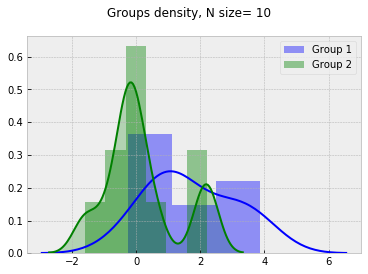

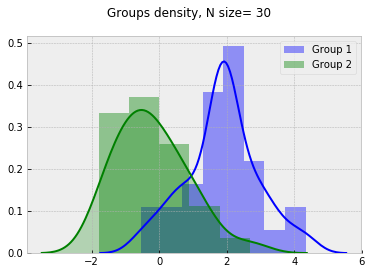

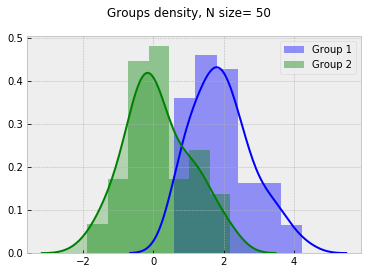

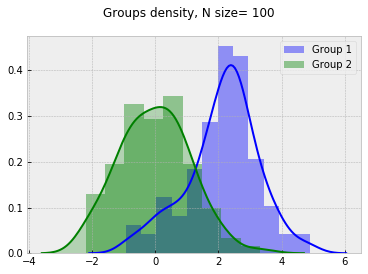

In [2]:
"""
- generate random numbers from sample distribution
- calculate variance and mean to apply formulas 
- use scipy.stats.t and .cdf() function to generate cumulative density function of Student’s t-distribution 
- plot each group distribution with respect of n size

"""    
# initialize n-size list     
N = [10, 30, 50, 100]

for n in N:
    x1 = np.random.randn(n) + 2 # set uз mean difference
    x2 = np.random.randn(n)
    # set up ddof=1 to make variance unbiased 
    var_1 = x1.var(ddof=1)
    var_2 = x2.var(ddof=1)
    mean_1 = x1.mean()
    mean_2 = x2.mean()
    
    diff = mean_1 - mean_2
    s_pol = np.sqrt((var_1+var_2)/2.0)
    # t-statistics calculation based on mean and variance
    t_stat = diff/(s_pol * np.sqrt(2.0/n)) 
    # compute degrees of freedom
    d_f = 2.0*n - 2.0
    # estimate p-value
    p = 1.0 - stats.t.cdf(t_stat, df=d_f)
    p_value = 2.0 * p
    # display t-stat and p-value for each N
    fig, ax = plt.subplots(1,1, sharex=True)
    print 't-statistic = '+str(round(t_stat,2)), 
    print 'p-value=' + '{:.15f}'.format(round(p_value, 10))
    # show distributions
    sns.distplot(x1, kde=True, color="b", label='Group 1')
    sns.distplot(x2, kde=True, color="g", kde_kws={"shade": True}, label = 'Group 2')
    fig.suptitle('Groups density, N size= '+str(n))
    
    plt.legend()
    fig.show()

Assuming 5% signifinace level, we see the groups difference tends to increace as sample size grows.

#### $\chi$-squared statistic for categorical data

While t-test refers to population mean, $\chi$-squared test is commonly used when we deal with categorical data (yes/no, 1/0) and test whether the number of data points is consistant with null hypothesis. <br>
$\chi^2$-statistic reffers to $\chi^2$ distribution and can never possibly be negative: more precisely,  $\chi^2$ test statistic approaches  $\chi^2$ distribution with N=$\infty$ - same as in Central limit theorem case. 

Analysing clicks through rate or conversion rate we look at binary choice and able to apply chi-sqared test, forming the number of successes or failures into *contingency table*: for instance, we test whether the difference between advertisement A and B is statistically significant based on users' clicks. 

Chi-squared statistic can be derived by formula:

$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$, <br>

where $O_i$ - observed value, $E_i$ - expected value.

#### $\chi$-squared in practice 

On the next stage we will see how chi-sqaured test works with binary data.<br>
Creating contingency table based on random choice with 1 or 0 outcome, display the p-value change for different sample size.

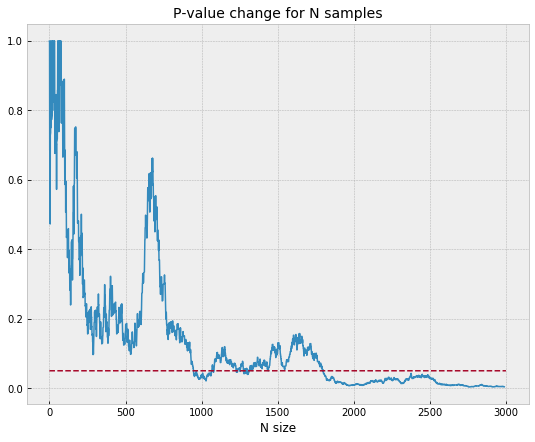

In [14]:
# import chi^2 from scipy library 
import scipy
from scipy.stats import chi2

"""
- create 2x2 matrix as contingency table
- randomly generate A nad B groups with N=3000 and binary outcome
- assume probability difference for 1 and 0 choice between groups
- use  chi2_contingency() from stats module to estimate chi-squared statistic

"""

T = np.zeros((2, 2)).astype(np.float32)
p_value=[]
for i in range(3000):
    A = np.random.choice(np.arange(0, 2), p=[0.4, 0.6])
    B = np.random.choice(np.arange(0, 2), p=[0.45, 0.55])
    T[0][0] += A!=0
    T[0][1] += A!=1
    T[1][0] += B!=0
    T[1][1] += B!=1
    if i>10:
        c2=scipy.stats.chi2_contingency(T, correction=False)
        p_value.append(c2[1])
        
# plot p-value change against 5% significance level 
fig, ax = plt.subplots(figsize=(9,7))
plt.plot(p_value, linewidth=1.5)
plt.plot(np.ones(3000)*0.05, '--', linewidth=1.5)
plt.title('P-value change for N samples', fontsize=14)
ax.set_xlabel('N size', fontsize=12)
plt.show()

It can be noticed the p-value remains above significant level (5%) till particular N sample size reached and never return.

### Bayesian approah for A/B testing

However, the approaches described above has its own drawbacks:

- The problem of sample size choice remains open and relies on rule of thumb in usual practise;
- "Explore-exploit" dilemma: early stopping with large p-value occurance can increase the chance to get False Positives;
- Impossible to observe that hypothesis is true with particular probabilites; 
- Multiple hypothesis definition is not possible. 


The points above can be resolved with Bayesian methods implementation.

#### Bayesian statistic: key concepts 

In Bayesian statistic we assume the distribution parameter ($\theta$) is random variables as well. Given data X, we form our *beliefs about this parameter* as $P(\theta|X)$ and suppose *how likely is the data* distributed as $P(X|\theta)$.<br>
Having prior equals $P(\theta)$ and integral componet, $P(X)$ we draw a conclusion about $\theta$:

 - $P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)}$ 

Important note that Bayesian statistic take into consideration parameter distribution after data collection as well, that allow us to reassign confidence to parameter estimate (we will see later in Multi-armed bandit problem case).

Then, suppose we work with binary outcome data and already know the **likelihood estimation**: <br>

 - $P(X|\theta)=\prod_{i=1}^{N}\theta^{x_i}(1-\theta)^{1-x_i}$

we apply Beta function as the **conjugate prior**:<br>
 - $ Beta(a,b) = \frac{\theta^{a-1}(1- \theta)^{b-1}}{B(a,b)}$

**Posterior estimation** drawn from combination of likelihood and prior:

 - $P(\theta|X) \approx \theta^{a-1+\sum_{i=1}^{N}{x_i}}(1-\theta)^{b-1+\sum_{i=1}^{N}(1-x_i)}$

Operating Bbayesian method we can update our knowledge by using posterior distribution as the prior with samples increase, adding extra information.<br>
Denote $a'$ = $a$ + #successes, $b'$ = $b$ + #failures, then new posterior can be expressed: 
 - $P(\theta|X) = Beta(a',b')$

#### Thompson sampling for multi-armed machine

As an example of Bayesian approach we illustrate the multi-armed bandit problem using Thompson sampling algorithm. <br>
In the problem context we are playing slot machines, given by different payouts. Expecting paybacks not equal for all slots, we need to find tradeoff between exloiting machine with highest payouts and explore optional variants. In other words, solve "explore vs. exploit dilemma", maximizing profit and learning from observed data. 

We will make n=1000 trails with 3 slots and different underlying probabilities. For each trail we will update a and b, collecting information from samples. 

In [18]:
"""
- start with import beta (beta distribution) and norm (normal distribution) modules 
- initialize array of underlying probabilities 
- for each trail we track maximum sample and update current guesses (a and b) with new success/failure numbers 

"""

from scipy.stats import beta, norm

bandits = [0.2, 0.5, 0.7]
# grid for plotting distributions for 3 slots 
x_grid = np.repeat(np.linspace(0, 1, 200), 3).reshape(-1, 3)
# create arrays to update beta distribution
# start updating information for pulls/successes
a = np.ones(3)
b = np.ones(3)
success = np.zeros(3)
pulls = np.zeros(3)
dist = stats.beta(a, b)
points=[100, 200, 500, 1000]
n = 1000
dists = [dist] # initialize distribution 
for j in range(n):
    # use argmax() to track the maximum sample 
    i = np.argmax(dist.rvs())
    x = np.random.rand() < bandits[i]
    success[i] += x
    pulls[i] += 1 # pull the bandit arm
    # create beta distribution with updated weights for a and b 
    dist = stats.beta(a + success, b + pulls - success) 
    dists.append(dist)

pulls number=100
pulls number=200
pulls number=500
pulls number=1000


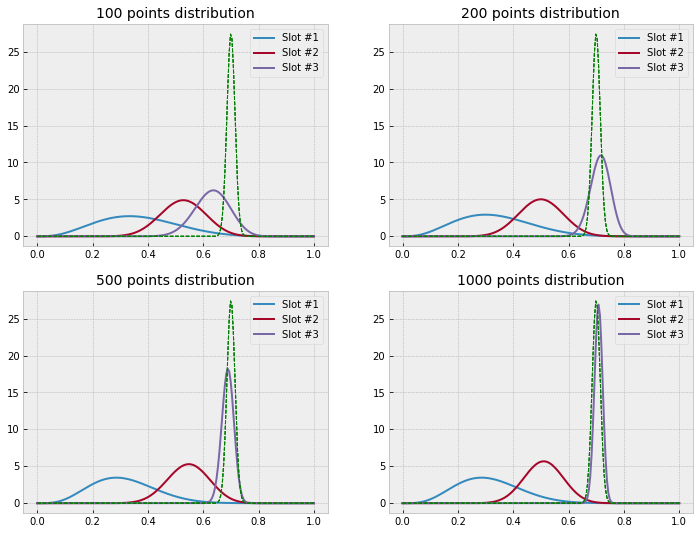

In [19]:
"""
- plot distributions for number of trails from list
- add Gaussian approximation for 3rd slot

"""
x_grid = np.repeat(np.linspace(0, 1, 200), 3).reshape(-1, 3)
plt.figure(figsize=(12, 9))
for i, j in enumerate(points):
    print 'pulls number='+str(j)
    
    plt.subplot(2,2, i+1)
    plt.plot(x_grid, dists[j].pdf(x_grid))
    std = np.sqrt(bandits[2] *(1 - bandits[2])/n) # add gaussian approximation to 3rd slot
    g = norm.pdf(x_grid, loc=bandits[2], scale=std)
    plt.plot(x_grid, g, '--', color='g', linewidth=1.0)
    plt.title(str(j)+' points distribution', fontsize=14)
    plt.legend(['Slot #'+str(i+1) for i,j in enumerate(bandits)])

As expected the third slot was exploited more: its variance has the lowest value with the highest pulls made.<br>
Besides there were no overlap between three of them, we became more certain about the highest payback slot. 
The green line shows Gaussian approximation of slot #3. It approaches to Bayesian shape with respect of N sample size increasing.<br>
Optional benefit of Thompson sampling method is opportunity to calclulate the probability of getting the best result over alternatives. 

### Conclusion

Bayesian approach seems the better option when we don't know the actual outcome but need to discover the ability of highest profit with limited resources. <br>
The key difference between traditional A/B and Bayesian method is how they deal with "exlore-exploit" dilemma. In contrast to A/B testing, bayesian solution for multi-armed bandit simultaneously adapt explore and exploit phases, while A/B tends to waste resources on explore stage before starting exploit.<br>
However, Bayesian drawbacks refer to computationaly difficulties and time consumption with testing multiple hypothesis, that can result as costs for company. 

Anyway, the choice between traditional approach and Bayesian is strongly relates to particular case and company's needs.

#### References:

http://people.duke.edu/~ccc14/sta-663-2016/index.html<br>
https://lazyprogrammer.me/bayesian-bandit-tutorial/<br>
https://conversionxl.com/blog/bandit-tests/